In [1]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore")

In [3]:
no_tumor_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'
yes_tumor_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

In [5]:
no_tumor_images = load_images_from_folder(no_tumor_dir)
yes_tumor_images = load_images_from_folder(yes_tumor_dir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'

In [6]:
no_tumor_dir = r'C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\notumor'
yes_tumor_dir = r'C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\pituitary'

In [7]:
def load_images_from_folder('C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\pituitary'):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

SyntaxError: invalid syntax (3930623091.py, line 1)

In [8]:
def load_images_from_folder("C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\pituitary"):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

SyntaxError: invalid syntax (1060253920.py, line 1)

In [9]:
def load_images_from_folder("C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\pituitary"):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

SyntaxError: invalid syntax (3118047539.py, line 1)

In [10]:
import os
import cv2

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

# Call the function with the folder path
folder_path = r"C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\pituitary"
images = load_images_from_folder(folder_path)


In [11]:
no_tumor_images = load_images_from_folder(r'C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\notumor')
yes_tumor_images = load_images_from_folder(r'C:\Users\G VENKATA RAMANA\Downloads\archive (2)\Training\pituitary')

In [12]:
no_tumor_labels = [0] * len(no_tumor_images)
yes_tumor_labels = [1] * len(yes_tumor_images)

In [13]:
X = np.array(no_tumor_images + yes_tumor_images)
y = np.array(no_tumor_labels + yes_tumor_labels)

In [14]:
print("Initial shape or dimensions of X", str(X.shape))

print ("Number of samples in our data: " + str(len(X)))
print ("Number of labels in our data: " + str(len(y)))


print("\n")
print ("Dimensions of images:" + str(X[0].shape))

Initial shape or dimensions of X (3052, 128, 128, 3)
Number of samples in our data: 3052
Number of labels in our data: 3052


Dimensions of images:(128, 128, 3)


<Figure size 640x480 with 0 Axes>

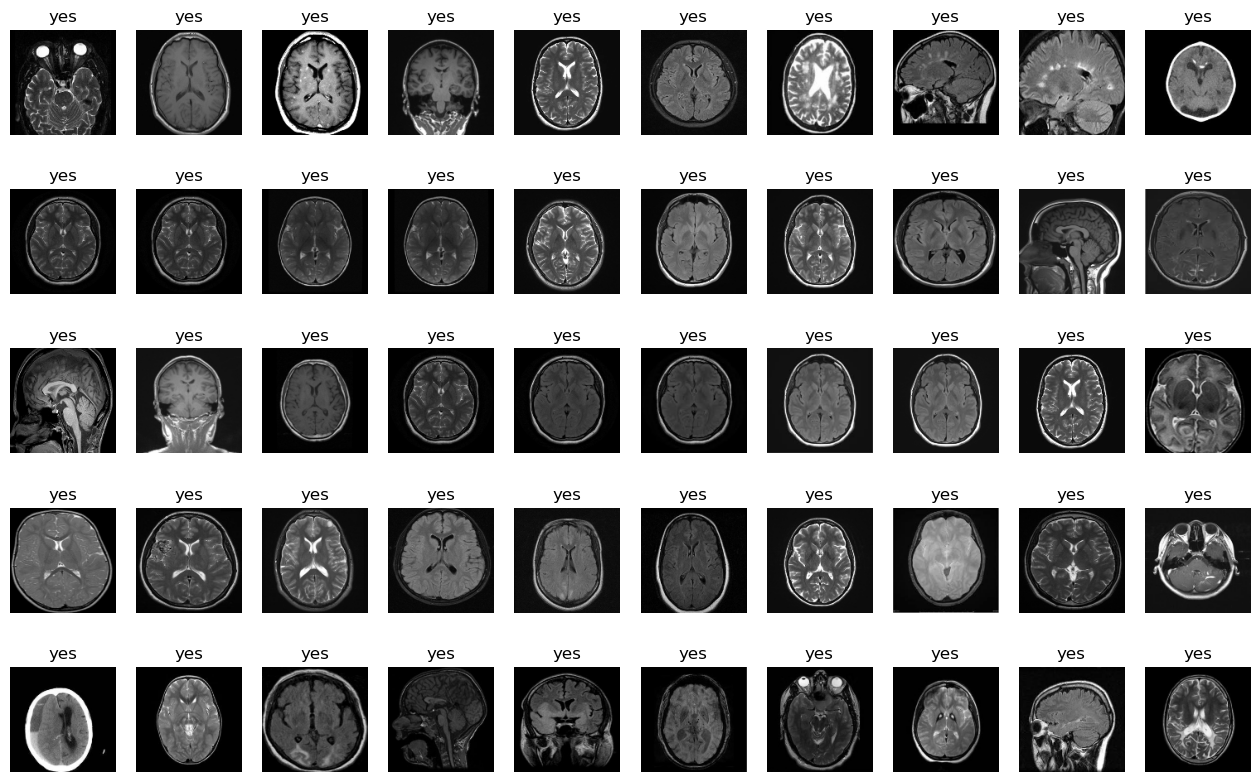

In [15]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 

classes = ["yes", "no"]

for index in range(1, num_of_images + 1):
    class_names = classes[y[index]]
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(X[index], cmap='gray_r')

In [16]:
X = X.astype('float32')

In [17]:
img_rows = X[0].shape[0]
img_cols = X[0].shape[1]

In [18]:
input_shape = (img_rows, img_cols, 3)

X /= 255.0
y = to_categorical(y, num_classes=2)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [20]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [21]:
L2 = 0.001

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
history = model.fit(X_train, y_train, batch_size = 8,
                              epochs = 25,
                              validation_data = (X_test, y_test),
                              verbose = 1,)

Epoch 1/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.7741 - loss: 0.4534 - val_accuracy: 0.9755 - val_loss: 0.1180
Epoch 2/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9524 - loss: 0.1391 - val_accuracy: 0.9542 - val_loss: 0.1350
Epoch 3/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9778 - loss: 0.0847 - val_accuracy: 0.9869 - val_loss: 0.0638
Epoch 4/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.9852 - loss: 0.0466 - val_accuracy: 0.9869 - val_loss: 0.0617
Epoch 5/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.9907 - loss: 0.0373 - val_accuracy: 0.9885 - val_loss: 0.0625
Epoch 6/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.9932 - loss: 0.0254 - val_accuracy: 0.9296 - val_loss: 0.2643
Epoch 7/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9885 - val_loss: 0.0546
Epoch 8/25
306/306 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.9976 - loss: 0.0117 -

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(16, activation='relu'),  # Smaller number of units to reduce capacity
    Dropout(0.5),  # Add a dropout layer with a 50% dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model with a higher learning rate to decrease accuracy
optimizer = Adam(learning_rate=0.01)  # Increase learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with only 3 epochs
history = model.fit(X_train, y_train, batch_size=32,  # Increased batch size to 32
                    epochs=3,  # Reduced to 3 epochs
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/3


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 1)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Change to 2 units with softmax for two classes
])

# Compile the model with categorical crossentropy for one-hot encoded targets
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with only 3 epochs
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=3,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/3
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7117 - loss: 2.5692 - val_accuracy: 0.9378 - val_loss: 0.1527
Epoch 2/3
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9301 - loss: 0.1627 - val_accuracy: 0.9640 - val_loss: 0.0858
Epoch 3/3
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9573 - loss: 0.1096 - val_accuracy: 0.9771 - val_loss: 0.0701


In [25]:
history = model.fit(X_train, y_train, batch_size = 8,
                              epochs = 3,
                              validation_data = (X_test, y_test),
                              verbose = 1,)

Epoch 1/3
306/306 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9520 - loss: 0.1505 - val_accuracy: 0.9411 - val_loss: 0.1804
Epoch 2/3
306/306 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9562 - loss: 0.1061 - val_accuracy: 0.9771 - val_loss: 0.0755
Epoch 3/3
306/306 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9742 - loss: 0.0738 - val_accuracy: 0.9755 - val_loss: 0.1567


In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [27]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       317
           1       0.96      0.99      0.97       294

    accuracy                           0.98       611
   macro avg       0.98      0.98      0.98       611
weighted avg       0.98      0.98      0.98       611



<Axes: >

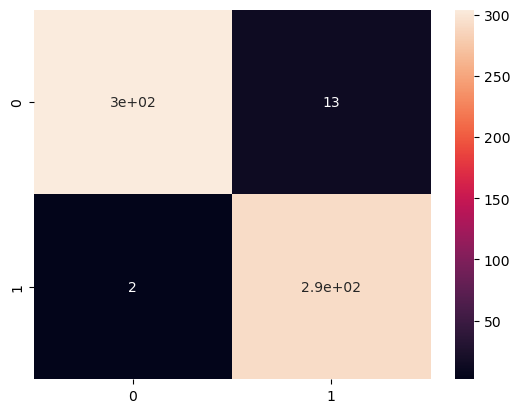

In [28]:
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True)